In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Inputing the number of neurons in input and output layer
def n_neurons():
    n_x=int(input('No. Of Input neurons:'))
    n_y=int(input('No. Of Output neurons:'))
    return n_x,n_y

In [3]:
## Inputing number of patterns for training and testing
def n_patterns():
    n_train=int(input('No. Of Training patterns:'))
    n_test=int(input('No. Of Testing patterns:'))
    return n_train,n_test

In [4]:
#Defining Activation Function
#Hidden Layer : Log Sigmoid Function
#Output Layer :Linear Function

In [5]:
def sigmoid(a,U):
    return 1/(1+np.exp(-a*U))

# Defining weights and bias matrix

In [6]:
def weight_matrix(n_neurons):
    n_inp=n_neurons[0]
    n_hidden=n_neurons[1]
    n_out=n_neurons[2]
    V = np.random.randn(n_inp,n_hidden)
    b1 = np.zeros((n_hidden,1))
    W = np.random.randn(n_hidden,n_out)
    b2 = np.zeros((n_out,1))
    return V,b1,W,b2

# Forward Propagation

In [7]:
def forward_prop(a,inputs,params):
    a1=a
    
    V=params['V']
    b1=params['b1']
    W=params['W']
    b2=params['b2']       
    
    I1=np.dot(V.T,inputs)+b1.T
    O1=sigmoid(a1,I1)[0]
    
    I2=np.dot(W.T,O1)+b2.T
    O2=I2[0]
    
    return I1,O1,I2,O2

# Back Propagation

In [8]:
def back_prop(constant,inputs,forward,target,W,n_neurons):
    inputs=inputs
    a1=constant
    I1=forward[0]
    O1=forward[1]
    I2=forward[2]
    O2=forward[3]
    T=target
    W=W
    n_i=n_neurons[0]
    n_h=n_neurons[1]
    n_o=n_neurons[2]
    
    x=[]
    for k in range(n_o):
        x.append(list((O2[k]-T[k])*O1))
    del_W=np.array(x).T
    
    x=[]
    for k in range(n_o):
        x.append((O2[k]-T[k]))
    del_b2=np.array(x).reshape(1,1)
    
    del_V=[]
    for i in range(n_i):
        y=[]
        for j in range(n_h):
            e_v=0
            for k in range(n_o):
                e_v+=(O2[k]-T[k])*W[j][k]*a1*O1[j]*(1-O1[j])*inputs[i]
            y.extend([e_v/2])
        del_V.append(y)
    
    x=[]
    for j in range(n_h):
        e_b1=0
        for k in range(n_o):
            e_b1+=(O2[k]-T[k])*a1*O1[j]*(1-O1[j])
        x.append([e_b1/2])
    del_b1=np.array(x)
    
    
    return del_W,del_b2,np.array(del_V),del_b1


# Normalization of Dataset

In [9]:
def normalize(x, o_min = 0.1, o_max = 0.9):
    i_min = np.min(x)
    i_max = np.max(x)
    return (o_min + (np.multiply((o_max - o_min), np.divide((x - i_min), (i_max - i_min)))))

# Training and Testing of Dataset

In [10]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape
#total number of rows and columns

(768, 9)

In [12]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df)

In [13]:
train_size,test_size=n_patterns()
train=shuffled_df.head(train_size)
test=shuffled_df.tail(test_size)
print('Training Data Shape:',train.shape,'Test Data Shape: ',test.shape)

No. Of Training patterns:500
No. Of Testing patterns:268
Training Data Shape: (500, 9) Test Data Shape:  (268, 9)


In [14]:
(X_train, y_train) = train.values[:, :-1], np.reshape(train.values[:, -1], (-1, 1))
(X_test, y_test) = test.values[:, :-1], np.reshape(test.values[:, -1], (-1, 1))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(500, 8)
(500, 1)
(268, 8)
(268, 8)


In [15]:
train_y = normalize(y_train)
test_y = normalize(y_test)
train_X = np.zeros((500, 8))
test_X = np.zeros((268, 8))
for i in range(8):
    train_X[:, i] = normalize(X_train[:, i])
    test_X[:, i] = normalize(X_test[:, i])

In [16]:
n_inputs,n_outputs=n_neurons()

No. Of Input neurons:8
No. Of Output neurons:1


# Error 

C:\Users\91916\AppData\Local\Temp\ipykernel_14884\1758355293.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*U))


0 iteration ===> mse_error : 8.679328055603225
10 iteration ===> mse_error : 8.6512189293729
20 iteration ===> mse_error : 8.651253025383769
30 iteration ===> mse_error : 8.651413579925505
40 iteration ===> mse_error : 8.651463594824
50 iteration ===> mse_error : 8.65147677996778
60 iteration ===> mse_error : 8.651480123130625
70 iteration ===> mse_error : 8.651480946046489
80 iteration ===> mse_error : 8.651481116347599
90 iteration ===> mse_error : 8.651481079681016
100 iteration ===> mse_error : 8.651480820667844
110 iteration ===> mse_error : 8.651478029328507
120 iteration ===> mse_error : 8.651888333071108
130 iteration ===> mse_error : 8.65189035724597
140 iteration ===> mse_error : 8.65189288569019
150 iteration ===> mse_error : 8.651895771367851
160 iteration ===> mse_error : 8.651899162755592
170 iteration ===> mse_error : 8.651883926918378
180 iteration ===> mse_error : 8.65188392691787
190 iteration ===> mse_error : 8.651883926917362


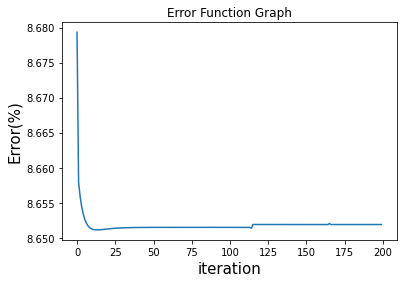

learning rate = 0.1 & no. of hidden neurons = 5 MSE : 8.651883926916911


In [17]:
n_hidden=5
n_iteration=200
n_neurons=[n_inputs,n_hidden,n_outputs]
params=weight_matrix(n_neurons)
err=[]
for iteration in range(n_iteration):
    error=0
    for index, row in train.iterrows():
        X=np.array(row.values[1:])
        Y=np.array(row.values[:1])
        net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
        forward=forward_prop(1,X,net_params)
        error+=sum(((forward[3]-Y)/1)**2)
        grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
        W=net_params['W']-0.1*grads[0]
        b2=net_params['b2']-0.1*grads[1]
        V=net_params['V']-0.1*grads[2]
        b1=net_params['b1']-0.1*grads[3]
        params=[V,b1,W,b2]
    mse=(error/768)
    err.append(mse)
    if(iteration%10==0):
        print('{} iteration ===> mse_error : {}'.format(iteration,mse,n_hidden))
plt.figure()
plt.xlabel('iteration',fontsize=15)
plt.ylabel('Error(%)',fontsize=15)
plt.plot(np.arange(200),err)
plt.title('Error Function Graph')
plt.show()
print('learning rate = 0.1 & no. of hidden neurons = '+str(n_hidden) + ' MSE : '+ str(err[-1]));

# Optimizing number of hidden neurons

C:\Users\91916\AppData\Local\Temp\ipykernel_14884\1758355293.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*U))


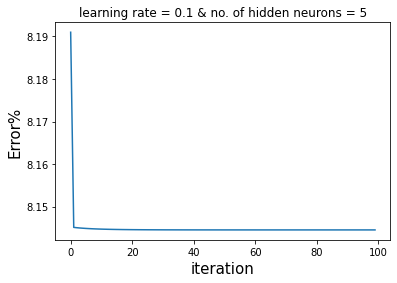

8.144529393618548


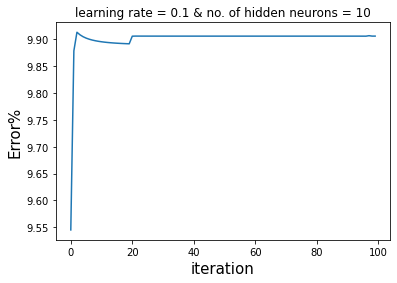

9.905790345820357


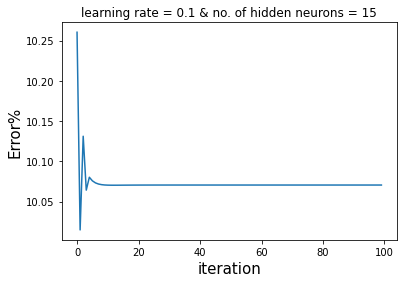

10.070611250812567


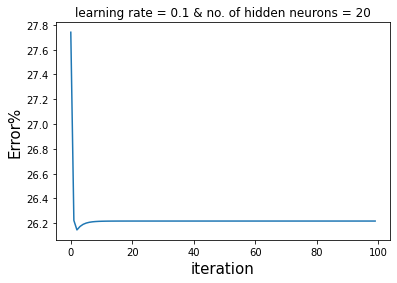

26.217832056316293


In [18]:
hidden=[5,10,15,20]
n_iteration=100

for n_hidden in hidden:
    n_neurons=[n_inputs,n_hidden,n_outputs]
    params=weight_matrix(n_neurons)
    err=[]
    for iteration in range(n_iteration):
        error=0
        for index, row in train.iterrows():
            X=np.array(row.values[1:])
            Y=np.array(row.values[:1])
            net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
            forward=forward_prop(1,X,net_params)
            error+=sum(((forward[3]-Y)/1)**2)
            grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
            W=net_params['W']-0.1*grads[0]
            b2=net_params['b2']-0.1*grads[1]
            V=net_params['V']-0.1*grads[2]
            b1=net_params['b1']-0.1*grads[3]
            params=[V,b1,W,b2]
        mse=(error/768)
        err.append(mse)
        #print('{} iteration ===> mse_error : {} , {}'.format(iteration,mse,n_hidden))
    plt.figure()
    plt.xlabel('iteration',fontsize=15)
    plt.ylabel('Error%',fontsize=15)
    plt.plot(np.arange(100),err)
    plt.title('learning rate = 0.1 & no. of hidden neurons = '+str(n_hidden));
    plt.show()
    print(err[-1])

## from above figures,the number of hidden neuron=5,gives the best minimum MSE with learning rate=0.1 and no of iteration =100

# Optimizing Learning Rate

C:\Users\91916\AppData\Local\Temp\ipykernel_14884\1758355293.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*U))


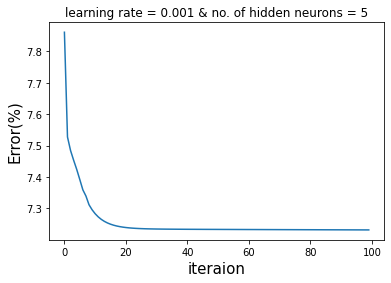

7.2316031114827934


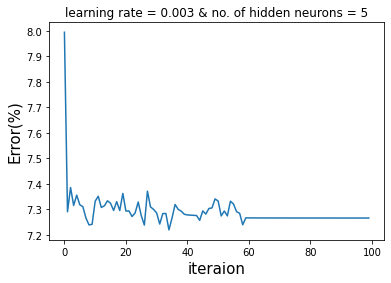

7.265744938596408


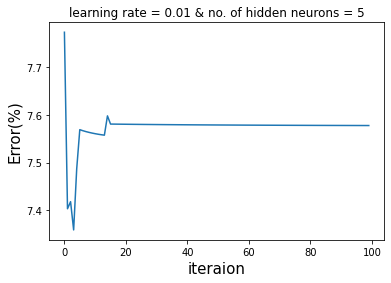

7.5778556790949


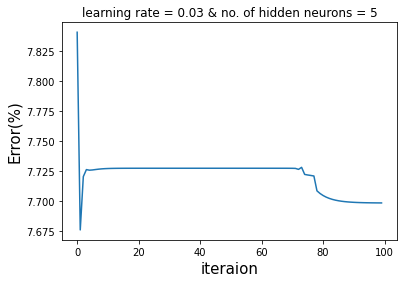

7.698652014075814


In [19]:
etas=[0.001,0.003,0.01,0.03]
n_iteration=100
n_hidden=5

for eta in etas:
    n_neurons=[n_inputs,n_hidden,n_outputs]
    params=weight_matrix(n_neurons)
    err=[]
    for epoch in range(n_iteration):
        error=0
        for index, row in train.iterrows():
            X=np.array(row.values[1:])
            Y=np.array(row.values[:1])
            net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
            forward=forward_prop(1,X,net_params)
            error+=sum(((forward[3]-Y)/1)**2)
            grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
            W=net_params['W']-eta*grads[0]
            b2=net_params['b2']-eta*grads[1]
            V=net_params['V']-eta*grads[2]
            b1=net_params['b1']-eta*grads[3]
            params=[V,b1,W,b2]
        mse=(error/768)
        err.append(mse)
        #print('{} iteration ===> mse_error : {} , {}'.format(iteration,tot_error,n_hidden))
    plt.figure()
    plt.xlabel('iteraion',fontsize=15)
    plt.ylabel('Error(%)',fontsize=15)
    plt.plot(np.arange(100),err)
    plt.title('learning rate = '+str(eta)+' & no. of hidden neurons = 5');
    plt.show()
    print(err[-1])

# from above figures,the learning rate=0.001,provides the best minimum  MSE with no of hidden neurons=5 and no of iteration=100

# Defining Final Model

iteration 0 =====> mse_error : 12.474987505240252
iteration 1 =====> mse_error : 7.448658965706269
iteration 2 =====> mse_error : 7.298823119880215
iteration 3 =====> mse_error : 7.2286913602875975
iteration 4 =====> mse_error : 7.1983422141808555
iteration 5 =====> mse_error : 7.14500333183312
iteration 6 =====> mse_error : 7.077551910342603
iteration 7 =====> mse_error : 7.100274639920113
iteration 8 =====> mse_error : 7.086133110040753
iteration 9 =====> mse_error : 7.193760536864004
iteration 10 =====> mse_error : 7.105314884784313
iteration 11 =====> mse_error : 6.966750798548574
iteration 12 =====> mse_error : 6.903843769492373
iteration 13 =====> mse_error : 7.247538708520296
iteration 14 =====> mse_error : 7.0719121953312865
iteration 15 =====> mse_error : 7.060474842675326
iteration 16 =====> mse_error : 7.084148746081897
iteration 17 =====> mse_error : 7.047777981179913
iteration 18 =====> mse_error : 7.0764347524733
iteration 19 =====> mse_error : 6.965942265840105
iteration

C:\Users\91916\AppData\Local\Temp\ipykernel_14884\1758355293.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*U))


iteration 82 =====> mse_error : 7.334626336704165
iteration 83 =====> mse_error : 7.32865908226152
iteration 84 =====> mse_error : 7.323954344741843
iteration 85 =====> mse_error : 7.320245265398227
iteration 86 =====> mse_error : 7.317320813136541
iteration 87 =====> mse_error : 7.315014192513062
iteration 88 =====> mse_error : 7.3131936887482345
iteration 89 =====> mse_error : 7.311755433529043
iteration 90 =====> mse_error : 7.3106176361549515
iteration 91 =====> mse_error : 7.309715967952672
iteration 92 =====> mse_error : 7.3089998822007765
iteration 93 =====> mse_error : 7.30842969566135
iteration 94 =====> mse_error : 7.307974283605151
iteration 95 =====> mse_error : 7.3076092616534964
iteration 96 =====> mse_error : 7.30731554389286
iteration 97 =====> mse_error : 7.307078172781732
iteration 98 =====> mse_error : 7.306885315125167
iteration 99 =====> mse_error : 7.30672735499908


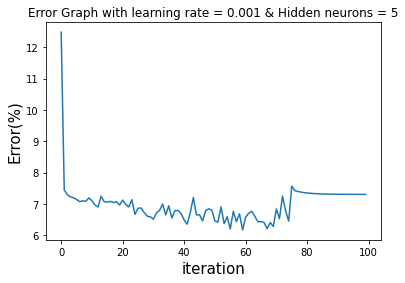

MSE of the above model : 7.30672735499908


In [20]:
# defining the hyperparameters
n_hidden=5
n_iteration=100
eta=0.001

#creating model
n_neurons=[n_inputs,n_hidden,n_outputs]
params=weight_matrix(n_neurons)
err=[]
for iteration in range(n_iteration):
    error=0
    for index, row in train.iterrows():
        X=np.array(row.values[1:])
        Y=np.array(row.values[:1])
        net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
        forward=forward_prop(1,X,net_params)
        error+=sum(((forward[3]-Y)/1)**2)
        grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
        W=net_params['W']-eta*grads[0]
        b2=net_params['b2']-eta*grads[1]
        V=net_params['V']-eta*grads[2]
        b1=net_params['b1']-eta*grads[3]
        params=[V,b1,W,b2]
    mse=(error/768)
    err.append(mse)
    #if(iteration%20==0):
    print('iteration {} =====> mse_error : {}'.format(iteration,mse))
plt.figure()
plt.xlabel('iteration',fontsize=15)
plt.ylabel('Error(%)',fontsize=15)
plt.plot(np.arange(100),err)
plt.title('Error Graph with learning rate = 0.001 & Hidden neurons = 5')
plt.show()
print('MSE of the above model : '+ str(err[-1]));

# Best hyperparameters are
# No of optimum hidden layer neuron=5
# Learning Rate=0.001
# 

In [21]:
#writing results in .csv file

In [22]:
#arr=np.random.rand(100,1)
#print("MSE_error")
#print(arr)
df2=pd.DataFrame(err,columns=['MSE_error(%)'])
df2


,MSE_error
0,12.474988
1,7.448659
2,7.298823
3,7.228691
4,7.198342
...,...
95,7.307609
96,7.307316
97,7.307078
98,7.306885


In [23]:
DF=pd.DataFrame(df2)
DF.to_csv("MSE_error.csv")

# Predicting the result

In [24]:
V=params[0]
b1=params[1]
W=params[2]
b2=params[3]

mse_error=np.zeros((1,))
#We'll get 6 different MSE for 6 output variables
for index, row in test.iterrows():
    X=np.array(row.values[1:])
    Y=np.array(row.values[:1])
    net_params={'V':V,'b1':b1,'W':W,'b2':b2}
    forward=forward_prop(1,X,net_params)
    mse_error+=((Y-forward[3])**2)
MSE_error= (mse_error/768)

C:\Users\91916\AppData\Local\Temp\ipykernel_14884\1758355293.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*U))


In [25]:
 for i in range(1):
    print('MSE error for target{} : {}'.format(i+1,np.round(MSE_error[i],3)))

MSE error for target1 : 3.815


In [26]:
error={'Target':['target'],
        'MSE':MSE_error}

In [27]:
DF1=pd.DataFrame(error)

In [28]:
#Writing result into output file

In [29]:
DF1.to_csv("Final_error.csv")

# The End